# CO2.2 Final Project (RF-DETR for Object Detection)

This project focuses on training and evaluating an object detection model using RF-DETR, a Transformer-based architecture developed by Roboflow. The objective is to detect and classify animals within images using a custom dataset obtained from Roboflow Universe, formatted in the COCO standard. The workflow begins with installing the necessary dependencies and downloading the dataset. The RF-DETR model is then fine-tuned on the dataset for 15 epochs, using a small batch size with gradient accumulation to manage resource usage.


After training, the model’s performance is assessed through inference on test images, comparing predicted detections to ground truth annotations. Visualizations are created using the Supervision library to highlight both true annotations and model predictions. Finally, a comprehensive evaluation is conducted using metrics such as mean Average Precision (mAP), a confusion matrix, accuracy, precision, recall, and F1 score. This project illustrates a complete deep learning pipeline for object detection, emphasizing the power and flexibility of Transformer-based models in computer vision.


Group 20

MARIA ALESSANDRA CAPILI

DARLA ZOLETA

### Install dependencies

Install the rfdetr package version 1.1.0. The -q option makes the installation run quietly with minimal output.









In [1]:
!pip install -q rfdetr==1.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 kB 20.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.6/131.6 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━

## Download dataset from Roboflow Universe

The dataset downloaded from Roboflow contains 1700 images, split into 70% training, 15% validation, and 15% test sets. Augmentation was applied by rotating images ±15 degrees, normalization was added, and the dataset was exported in COCO format for use with the RFDetr model.

In [2]:
#Get dataset from Roboflow using the roboflow library and an API key to access a specific project and version.
#This will download the dataset in COCO format for use in training or evaluation.

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="1PoFwaH9K5JIFWIk7yen")
project = rf.workspace("ds4-eppen").project("animals-ij5d2-vwfnu")
version = project.version(2)
dataset = version.download("coco")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to animals-2 in coco:: 100%|██████████| 1708/1708 [00:00<00:00, 5603.76it/s]


In [3]:
#Create and train an RFDetr model using RFDETRBase() from the rfdetr library.
#This trains the model for 15 epochs with a batch size of 4, gradient accumulation of 4 steps, and a learning rate of 0.0001 using the dataset downloaded earlier.

from rfdetr import RFDETRBase

model = RFDETRBase()

model.train(dataset_dir=dataset.location, epochs=15, batch_size=4, grad_accum_steps=4, lr=1e-4)


rf-detr-base.pth: 100%|██████████| 355M/355M [00:17<00:00, 21.8MiB/s]
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/88.2M [00:00<?, ?B/s]

Loading pretrain weights


reinitializing your detection head with 11 classes.


TensorBoard logging initialized. To monitor logs, use 'tensorboard --logdir output' and open http://localhost:6006/ in browser.
Not using distributed mode
git:
  sha: N/A, status: clean, branch: N/A

Namespace(num_classes=11, grad_accum_steps=4, amp=True, lr=0.0001, lr_encoder=0.00015, batch_size=4, weight_decay=0.0001, epochs=15, lr_drop=100, clip_max_norm=0.1, lr_vit_layer_decay=0.8, lr_component_decay=0.7, do_benchmark=False, dropout=0, drop_path=0.0, drop_mode='standard', drop_schedule='constant', cutoff_epoch=0, pretrained_encoder=None, pretrain_weights='rf-detr-base.pth', pretrain_exclude_keys=None, pretrain_keys_modify_to_load=None, pretrained_distiller=None, encoder='dinov2_windowed_small', vit_encoder_num_layers=12, window_block_indexes=None, position_embedding='sine', out_feature_indexes=[2, 5, 8, 11], freeze_encoder=False, layer_norm=True, rms_norm=False, backbone_lora=False, force_no_pretrain=False, dec_layers=3, dim_feedforward=2048, hidden_dim=256, sa_nheads=8, ca_nheads=

Epoch: [0]  [ 0/87]  eta: 0:15:41  lr: 0.000100  class_error: 100.00  loss: 12.1429 (12.1429)  loss_ce: 1.2514 (1.2514)  loss_bbox: 1.1705 (1.1705)  loss_giou: 0.3820 (0.3820)  loss_ce_0: 1.1892 (1.1892)  loss_bbox_0: 1.6101 (1.6101)  loss_giou_0: 0.4983 (0.4983)  loss_ce_1: 1.2499 (1.2499)  loss_bbox_1: 1.2173 (1.2173)  loss_giou_1: 0.3958 (0.3958)  loss_ce_enc: 1.2014 (1.2014)  loss_bbox_enc: 1.4872 (1.4872)  loss_giou_enc: 0.4898 (0.4898)  loss_ce_unscaled: 1.2514 (1.2514)  class_error_unscaled: 100.0000 (100.0000)  loss_bbox_unscaled: 0.2341 (0.2341)  loss_giou_unscaled: 0.1910 (0.1910)  cardinality_error_unscaled: 3896.7500 (3896.7500)  loss_ce_0_unscaled: 1.1892 (1.1892)  loss_bbox_0_unscaled: 0.3220 (0.3220)  loss_giou_0_unscaled: 0.2492 (0.2492)  cardinality_error_0_unscaled: 3162.0000 (3162.0000)  loss_ce_1_unscaled: 1.2499 (1.2499)  loss_bbox_1_unscaled: 0.2435 (0.2435)  loss_giou_1_unscaled: 0.1979 (0.1979)  cardinality_error_1_unscaled: 3844.2500 (3844.2500)  loss_ce_enc_un

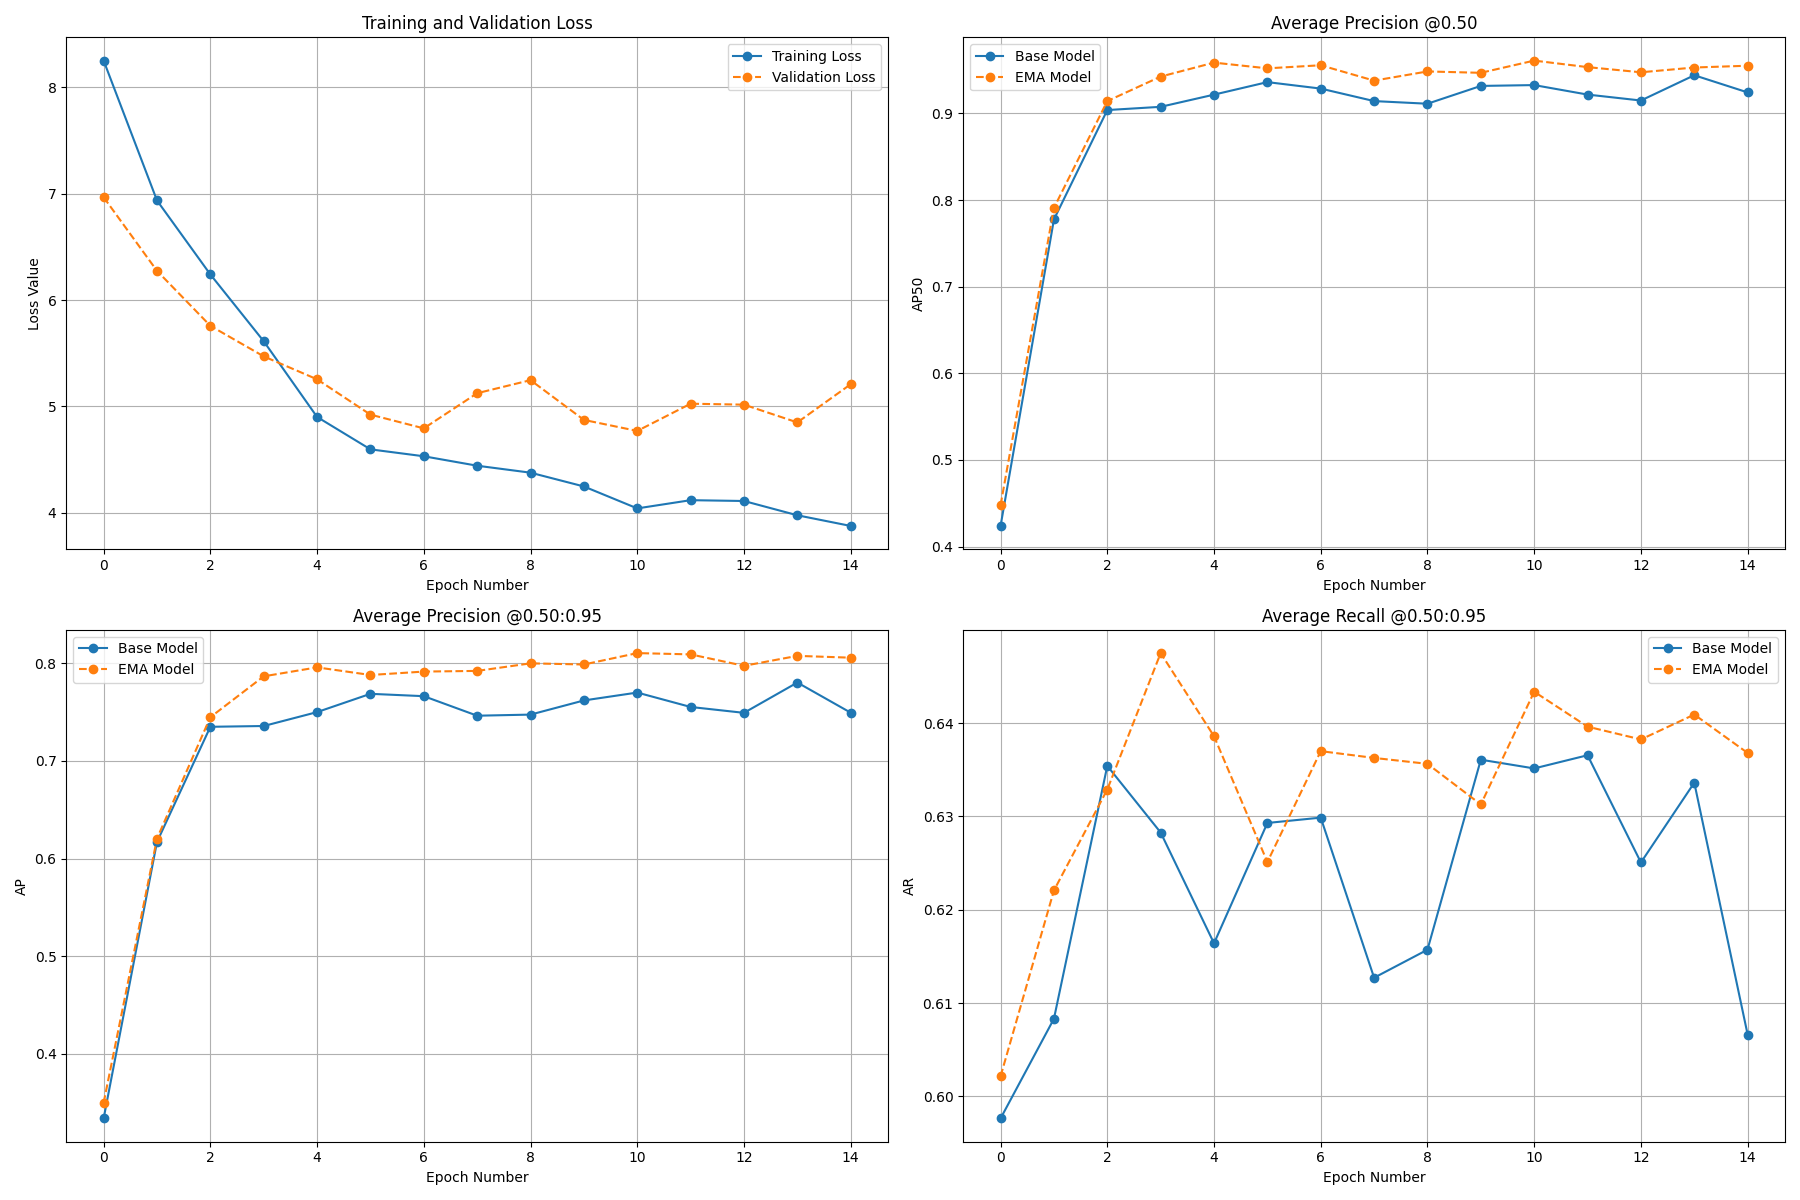

In [4]:
#Open and display an image using the PIL (Python Imaging Library).
#This command loads the file metrics_plot.png from the /content/output/ directory.

from PIL import Image

Image.open("/content/output/metrics_plot.png")

# Graph Interpretation

The visualized training metrics provide insight into the performance of the RFDetr base model over 15 epochs, comparing both the Base Model and the EMA (Exponential Moving Average) Model.

Top Left: Training and Validation Loss
This plot shows that both training and validation loss decrease steadily, especially during the first few epochs. The training loss continues to drop consistently, while the validation loss flattens and fluctuates slightly after epoch 5. This may indicate the model is learning well, though a bit of overfitting could be starting beyond that point.

Top Right: Average Precision @ IoU 0.50
The Average Precision at IoU 0.50 rapidly increases during the first 2-3 epochs, then stabilizes above 0.90 for both models. The EMA model consistently outperforms the base model, reaching close to or above 0.95 in the later epochs, indicating highly accurate detections when allowing looser IoU matching.

Bottom Left: Average Precision @ IoU 0.50:0.95
This more challenging metric also shows steady improvements. The EMA model maintains a clear advantage over the base model throughout, peaking just over 0.80, while the base model remains slightly lower. This confirms the EMA model is more robust across various IoU thresholds.

Bottom Right: Average Recall @ IoU 0.50:0.95
Recall starts around 0.60 and increases slightly over time. The EMA model again shows a more consistent and slightly higher performance than the base model. The fluctuations in the base model suggest less stable recall performance across epochs.

Overall, the training metrics indicate that the model learns effectively during the early epochs, with strong performance in precision and recall metrics. The EMA model consistently performs better than the base model, especially in precision-related metrics, which suggests that enabling EMA can help improve generalization. The training was stable, with no signs of major divergence or degradation, making 15 epochs a reasonable duration for training on this dataset.




## Run inference with fine-tuned model

In [5]:
#Install the supervision library and import it as sv to work with computer vision datasets.
#This code loads the test set from the COCO-formatted dataset using DetectionDataset.from_coco, pointing to the test images and annotations.

!pip install supervision

import supervision as sv

ds = sv.DetectionDataset.from_coco(
    images_directory_path=f"{dataset.location}/test",
    annotations_path=f"{dataset.location}/test/_annotations.coco.json",
)

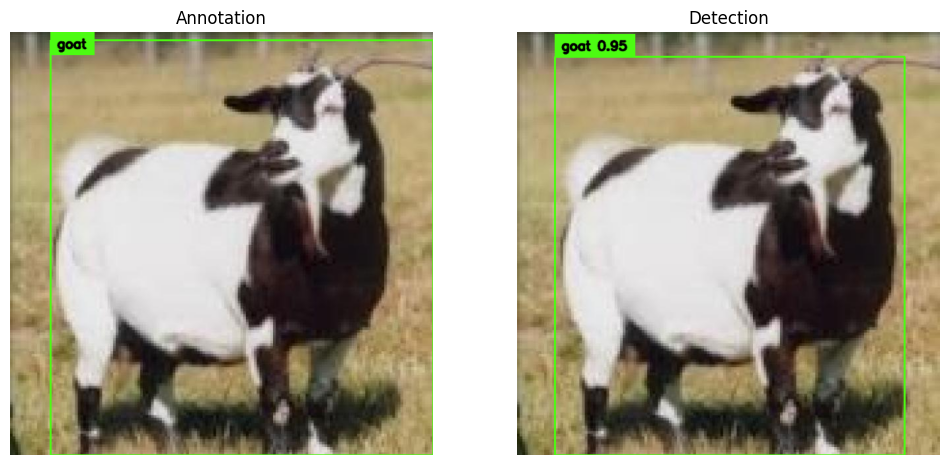

In [6]:
#This code visualizes both the ground truth annotations and the model's predictions on a test image.
#It uses the supervision library to draw bounding boxes and labels for annotations and detections, then displays them side by side in a 1x2 grid titled "Annotation" and "Detection".

from rfdetr import RFDETRBase
import supervision as sv
from PIL import Image

path, image, annotations = ds[0]
image = Image.open(path)

detections = model.predict(image, threshold=0.5)

text_scale = sv.calculate_optimal_text_scale(resolution_wh=image.size)
thickness = sv.calculate_optimal_line_thickness(resolution_wh=image.size)

bbox_annotator = sv.BoxAnnotator(thickness=thickness)
label_annotator = sv.LabelAnnotator(
    text_color=sv.Color.BLACK,
    text_scale=text_scale,
    text_thickness=thickness,
    smart_position=True)

annotations_labels = [
    f"{ds.classes[class_id]}"
    for class_id
    in annotations.class_id
]

detections_labels = [
    f"{ds.classes[class_id]} {confidence:.2f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]

annotation_image = image.copy()
annotation_image = bbox_annotator.annotate(annotation_image, annotations)
annotation_image = label_annotator.annotate(annotation_image, annotations, annotations_labels)

detections_image = image.copy()
detections_image = bbox_annotator.annotate(detections_image, detections)
detections_image = label_annotator.annotate(detections_image, detections, detections_labels)

sv.plot_images_grid(images=[annotation_image, detections_image], grid_size=(1, 2), titles=["Annotation", "Detection"])

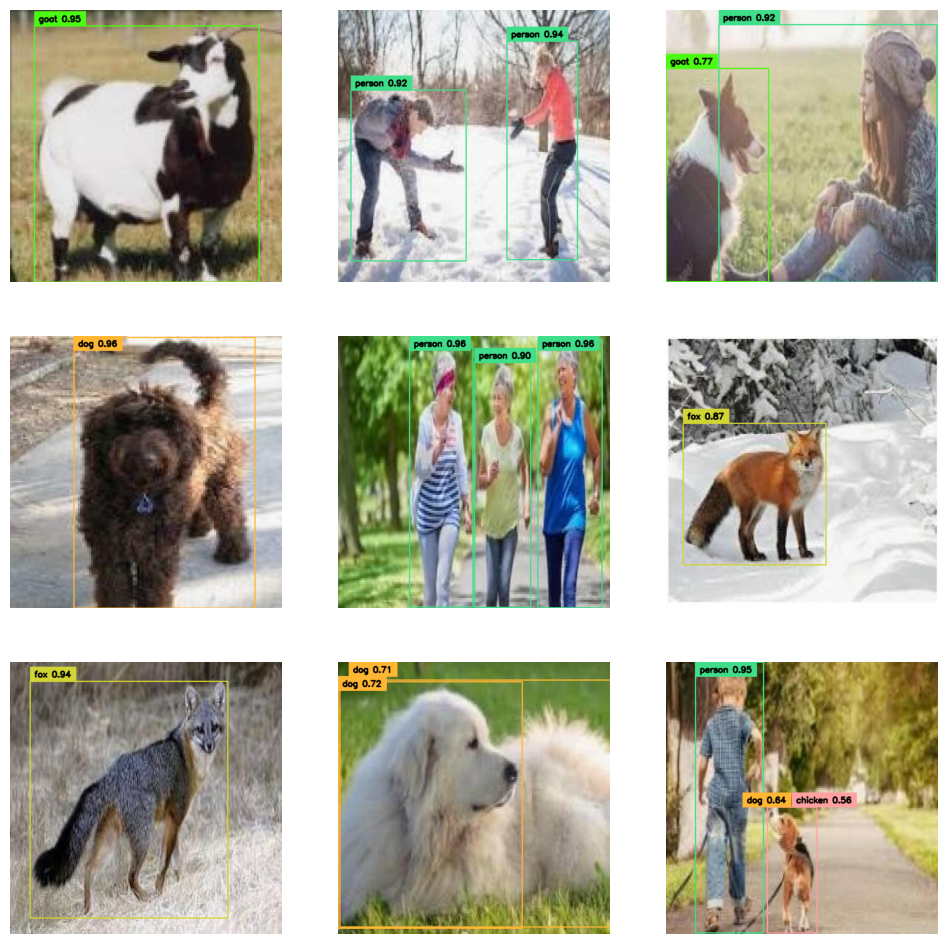

In [7]:
#This code loops through the first 9 test images, runs object detection using the trained RFDetr model, and draws the predicted bounding boxes with class labels and confidence scores.
#The results are displayed in a 3×3 grid using the supervision library.

import supervision as sv
from rfdetr import RFDETRBase
from PIL import Image

detections_images = []

for i in range(9):
    path, image, annotations = ds[i]
    image = Image.open(path)

    detections = model.predict(image, threshold=0.5)

    text_scale = sv.calculate_optimal_text_scale(resolution_wh=image.size)
    thickness = sv.calculate_optimal_line_thickness(resolution_wh=image.size)

    bbox_annotator = sv.BoxAnnotator(thickness=thickness)
    label_annotator = sv.LabelAnnotator(
        text_color=sv.Color.BLACK,
        text_scale=text_scale,
        text_thickness=thickness,
        smart_position=True)

    detections_labels = [
        f"{ds.classes[class_id]} {confidence:.2f}"
        for class_id, confidence
        in zip(detections.class_id, detections.confidence)
    ]

    detections_image = image.copy()
    detections_image = bbox_annotator.annotate(detections_image, detections)
    detections_image = label_annotator.annotate(detections_image, detections, detections_labels)

    detections_images.append(detections_image)

sv.plot_images_grid(images=detections_images, grid_size=(3, 3), size=(12, 12))

## Evaluate fine-tuned model

In [8]:
#Evaluate the model's performance by collecting ground truth annotations and predicted detections for all images in the dataset.
#This will loop through each image with tqdm for progress tracking and store the results in targets and predictions for calculating evaluation metrics.

import supervision as sv
from tqdm import tqdm
from supervision.metrics import MeanAveragePrecision

targets = []
predictions = []

for path, image, annotations in tqdm(ds):
    image = Image.open(path)
    detections = model.predict(image, threshold=0.5)

    targets.append(annotations)
    predictions.append(detections)

100%|██████████| 150/150 [00:07<00:00, 20.45it/s]


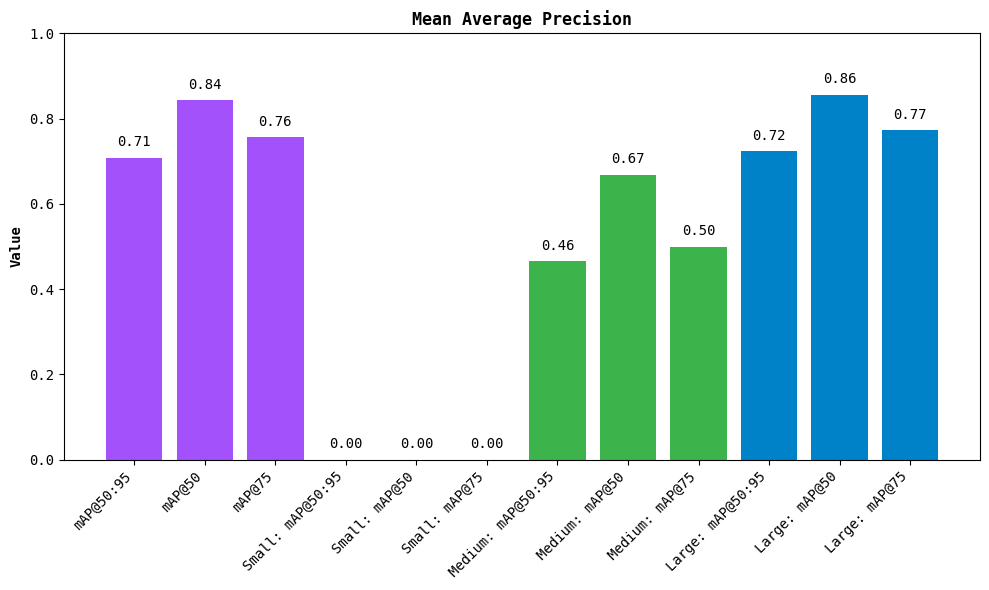

In [9]:
#Calculate the Mean Average Precision (mAP) using the MeanAveragePrecision class from the supervision library.
#This will evaluate the model's detection performance and plot precision-recall curves for each class.

map_metric = MeanAveragePrecision()
map_result = map_metric.update(predictions, targets).compute()

map_result.plot()

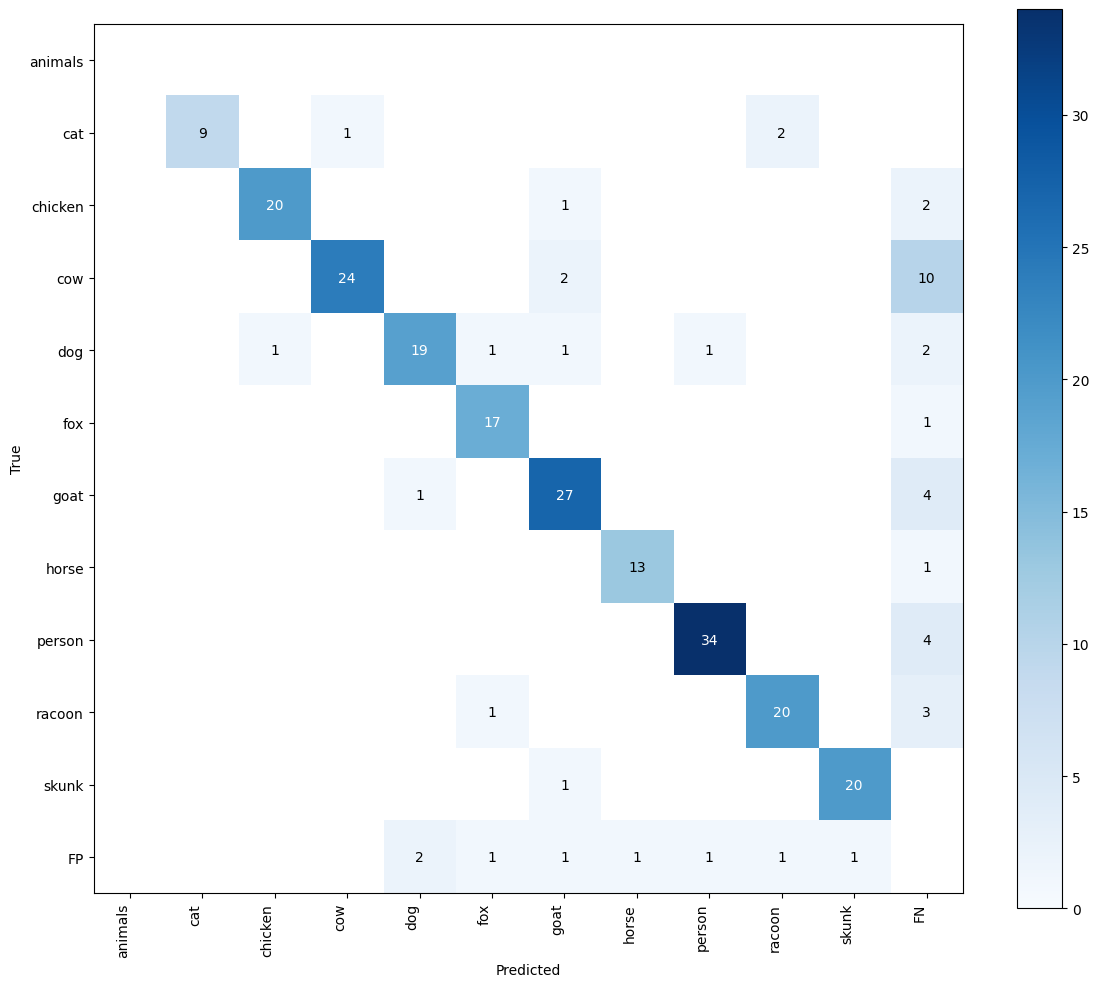

In [10]:
#Calculate the confusion matrix using predicted and ground truth detections with class labels.
#This will show how well the model distinguishes between classes by plotting the confusion matrix.

confusion_matrix = sv.ConfusionMatrix.from_detections(
    predictions=predictions,
    targets=targets,
    classes=ds.classes
)

confusion_matrix.plot()

# Confusion Matrix Interpretation

The confusion matrix shown evaluates the performance of the object detection model by comparing predicted and actual (true) class labels across various animal categories. Each row represents the actual class, while each column represents the predicted class. Ideally, high values should appear along the diagonal, indicating correct predictions.

From the matrix:

* The model performs very well on classes like **person** (34 correct detections), **goat** (27), **cow** (24), **chicken** (20), **dog** (19), **fox** (17), and **skunk** (20), where most predictions fall on the correct diagonal cell.
* Some classes show confusion. For example, the **dog** class was sometimes predicted as cat, cow, or person. The **cat** class had 1 prediction confused with chicken, and **chicken** was occasionally predicted as raccoon.
* The bottom row (FP) shows false positives, which are predictions made for each class when no actual object was present. These values are low (e.g., 2 for “animals,” and 1 each for others), meaning the model does not over-predict much.
* The rightmost column (FN) shows false negatives, which are missed detections for each class. Notably, **cow** and **goat** have higher FN values (10 and 4, respectively), suggesting some objects of these classes went undetected.

Overall, the matrix suggests that the model generally performs well, with strong detection for most classes and relatively few misclassifications or false detections. However, improvements could be made in reducing confusion between similar-looking animals and lowering false negatives in certain categories.


In [11]:
#Calculate the accuracy, precision, recall, and F1 score using values extracted from the confusion matrix.
#This will give an overall summary of the model's classification performance across all classes.

import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get confusion matrix
cm = confusion_matrix.matrix  # NumPy array (float64 values)

# Extract y_true and y_pred
y_true = []
y_pred = []

num_classes = cm.shape[0]

for true_class in range(num_classes):
    for pred_class in range(num_classes):
        count = int(cm[true_class, pred_class])  # Convert to int
        y_true += [true_class] * count
        y_pred += [pred_class] * count

# Compute and print metrics
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision (macro):", precision_score(y_true, y_pred, average='macro', zero_division=0))
print("Recall (macro):", recall_score(y_true, y_pred, average='macro', zero_division=0))
print("F1 Score (macro):", f1_score(y_true, y_pred, average='macro', zero_division=0))


Accuracy: 0.8087649402390438
Precision (macro): 0.8308328342715694
Recall (macro): 0.7675862622630357
F1 Score (macro): 0.7943700775423914


# Results Interpretation

The evaluation results show that the RFDetr base model trained for 15 epochs on the 1700-image dataset achieved an accuracy of 80.88%, indicating that about 8 out of 10 predictions were correct overall. The macro precision of 83.08% suggests the model is generally good at avoiding false positives across classes, while the macro recall of 76.76% shows it misses some true objects, especially in harder-to-detect classes. The macro F1 score of 79.44% reflects a solid balance between precision and recall.

Given the relatively small dataset size and modest training duration, these are strong results. However, there is still room to improve recall, possibly by training longer, applying more diverse augmentations, or fine-tuning with a pretrained backbone.


# References



*   Roboflow. (n.d.). RT-DETR: Real-time object detection with transformers. https://roboflow.com/model/rt-detr
*   Johnson, J. (2023, July 27). How to train RT-DETR on a custom dataset with transformers. Roboflow. https://blog.roboflow.com/train-rt-detr-custom-dataset-transformers/
* Murtaza, S. (2024, January 15). RF-DETR: An open-source object detection model. LearnOpenCV. https://learnopencv.com/rf-detr-object-detection/
* Sharma, A. (2025, March). Roboflow’s RF-DETR: A powerful object detection model. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2025/03/roboflows-rf-detr/
* Tang, Y., Li, Z., Wu, L., He, Y., Huang, G., & Wang, X. (2025). RT-DETR: RT-DETR: Real-Time Detection Transformer (arXiv preprint arXiv:2504.13099v1). https://arxiv.org/abs/2504.13099v1

